<a href="https://colab.research.google.com/github/niztor/austral-mcd-algoritmos/blob/main/290_TareaHogar_02_Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resultados Análisis GridSearch

In [35]:
rm(list=ls(all.names=TRUE))
packages <-c("data.table", "patchwork", "ggplot2", "kableExtra", "IRdisplay")

# Se instalan los paquetes si son nesecarios
packages_to_install <- c() # Vector de Instalacion de paquete
for (pkg in packages) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    # Si no encuentra el paquete , lo agrega a la lista
    packages_to_install <- c(packages_to_install, pkg)
  }
}

if (length(packages_to_install) > 0) {
  install.packages(packages_to_install, repos = 'http://cran.rstudio.com/')
}

# se cargan los paquetes
lapply(packages, library, character.only = TRUE)


[[1]]
 [1] "IRdisplay"  "kableExtra" "knitr"      "ggplot2"    "patchwork" 
 [6] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"      

[[2]]
 [1] "IRdisplay"  "kableExtra" "knitr"      "ggplot2"    "patchwork" 
 [6] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"      

[[3]]
 [1] "IRdisplay"  "kableExtra" "knitr"      "ggplot2"    "patchwork" 
 [6] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"      

[[4]]
 [1] "IRdisplay"  "kableExtra" "knitr"      "ggplot2"    "patchwork" 
 [6] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"      

[[5]]
 [1] "IRdisplay"  "kableExtra" "knitr"      "ggplot2"    "patchwork" 
 [6] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"

In [36]:
system("pip install gdown")

Cargo el archivo gridsearch_detalles.txt

In [37]:
#https://drive.google.com/file/d/1PHyPU_TNPO3jq8JtUNfLX8T0SAqbNUEu/view?usp=sharing
results_file_id = "1PHyPU_TNPO3jq8JtUNfLX8T0SAqbNUEu"
command <- paste("gdown --id", results_file_id, "-O gridsearch_detalle.txt")
system(command)

In [38]:
tryCatch({
  results <- fread("gridsearch_detalle.txt")

  # Imprimir las primeras filas para confirmar
  print("¡Archivo cargado exitosamente desde el enlace público! Primeras 6 filas:")
  print(head(results))

}, error = function(e) {
  print(paste("Error al leer el archivo:", e$message))
  print("Verifica que el FILE_ID sea correcto y que el archivo sea un CSV válido.")
})

[1] "¡Archivo cargado exitosamente desde el enlace público! Primeras 6 filas:"
   semilla    cp maxdepth minsplit minbucket ganancia_test
     <int> <num>    <int>    <int>     <int>         <num>
1:  992633 -0.01        4     2304       768      50150000
2:  992633 -0.01        4      576       192      50550000
3:  992633 -0.01        6     2304       768      48260000
4:  992633 -0.01        6      576       192      50730000
5:  992633 -0.01        8     2304       768      46710000
6:  992633 -0.01        8      576       192      51120000


Filtramos y ordenamos resultados ordenados por ganancia

In [42]:

r_search <- results[,
  list( "ganancia_mean" = mean(ganancia_test), "qty" = .N ),
  list( cp, maxdepth, minsplit, minbucket )
]

table <- kable(r_search[order(-ganancia_mean)][1:10]  ,
      format = "html",
      caption = "<h2>Resultados GridSearch</h2>",
      digits = 2, # Redondear todos los números a 2 decimales
      col.names = names(r_search)
) |>
  kable_styling(
    bootstrap_options = c("striped", "bordered", "hover", "condensed"),
    full_width = FALSE
  )

display_html(as.character(table))



cp,maxdepth,minsplit,minbucket,ganancia_mean,qty
-0.5,10,750,41,57610000,1
-0.5,10,760,41,57610000,1
-0.5,10,770,41,57610000,1
-0.5,10,780,41,57610000,1
-0.5,10,750,40,57570000,1
-0.5,10,775,40,57570000,1
-0.5,10,750,42,57570000,1
-0.5,10,760,40,57570000,1
-0.5,10,760,42,57570000,1
-0.5,10,770,40,57570000,1


In [63]:
setorder( r_search, -ganancia_mean )
r_search[, id := .I ]
r_search[id %in% c(1,2,5,10,50,100)]

cp,maxdepth,minsplit,minbucket,ganancia_mean,qty,id
<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>
-0.5,10,750,41,57610000,1,1
-0.5,10,760,41,57610000,1,2
-0.5,10,750,40,57570000,1,5
-0.5,10,770,40,57570000,1,10
-0.5,10,710,43,57360000,1,50
-0.5,10,710,39,57040000,1,100


Gráficas utilizadas para determinar la region de mayor ganancia, a traves de la variacion de hyperparámetros

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


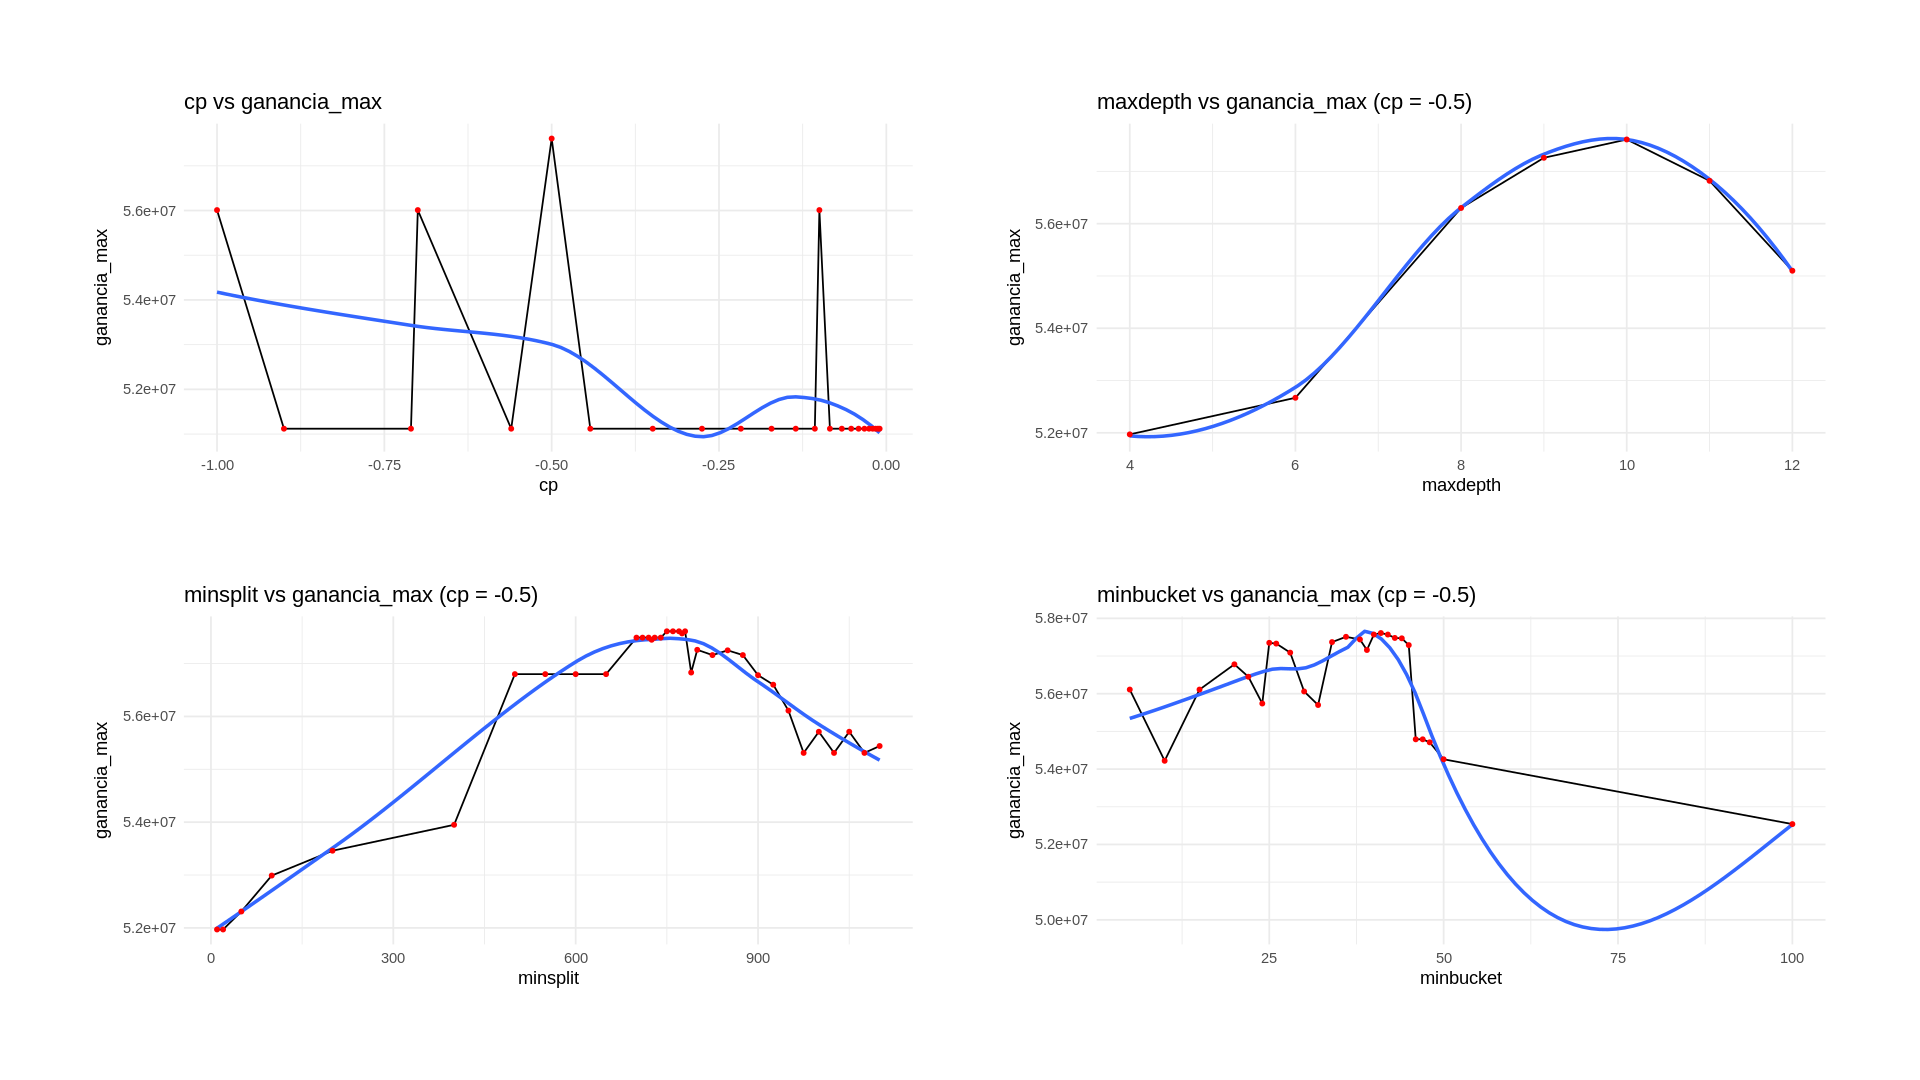

In [55]:
options(repr.plot.width = 16, repr.plot.height = 9)


r_search_cp <- results[ cp < 0,
                                list("ganancia_max" = max(ganancia_test)),
                                list( cp)]

r_search_maxdepth_05 <- results[cp == -0.5,
                                list("ganancia_max" = max(ganancia_test)),
                                list( maxdepth)]

r_search_minsplit_05 <- results[cp == -0.5,
                                list("ganancia_max" = max(ganancia_test)),
                                list( minsplit)]

r_search_minbucket_05 <- results[cp == -0.5,
                                list("ganancia_max" = max(ganancia_test)),
                                list( minbucket)]

p_cp <- ggplot(data = r_search_cp, aes(x = cp, y = ganancia_max)) +
  geom_line() + geom_smooth(se = FALSE) + geom_point(size=1, color = "red") +
  labs(title = "cp vs ganancia_max") + theme_minimal()

p_maxdepth <- ggplot(data = r_search_maxdepth_05, aes(x = maxdepth, y = ganancia_max)) +
  geom_line() + geom_smooth(se = FALSE) + geom_point(size=1, color = "red") +
  labs(title = "maxdepth vs ganancia_max (cp = -0.5)") + theme_minimal()

p_minsplit <- ggplot(data = r_search_minsplit_05, aes(x = minsplit, y = ganancia_max)) +
  geom_line() + geom_smooth(se = FALSE) + geom_point(size=1, color = "red") +
  labs(title = "minsplit vs ganancia_max (cp = -0.5)") + theme_minimal()

p_minbucket <- ggplot(data = r_search_minbucket_05, aes(x = minbucket, y = ganancia_max)) +
  geom_line() + geom_smooth(se = FALSE) + geom_point(size=1, color = "red") +
  labs(title = "minbucket vs ganancia_max (cp = -0.5)") + theme_minimal()


composicion <- p_cp + p_maxdepth + p_minsplit + p_minbucket +
  plot_layout(nrow = 2, ncol = 2)

composicion &
  theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))